In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [36]:
myanmar_map = gpd.read_file('/Users/catherinefuller/galvanize/daimil10/projects/Mid_Term/Myanmar_Food/shapefiles/mmr_polbnda_adm1_250k_mimu_1/mmr_polbnda_adm1_250k_mimu_1.shp')

<Axes: >

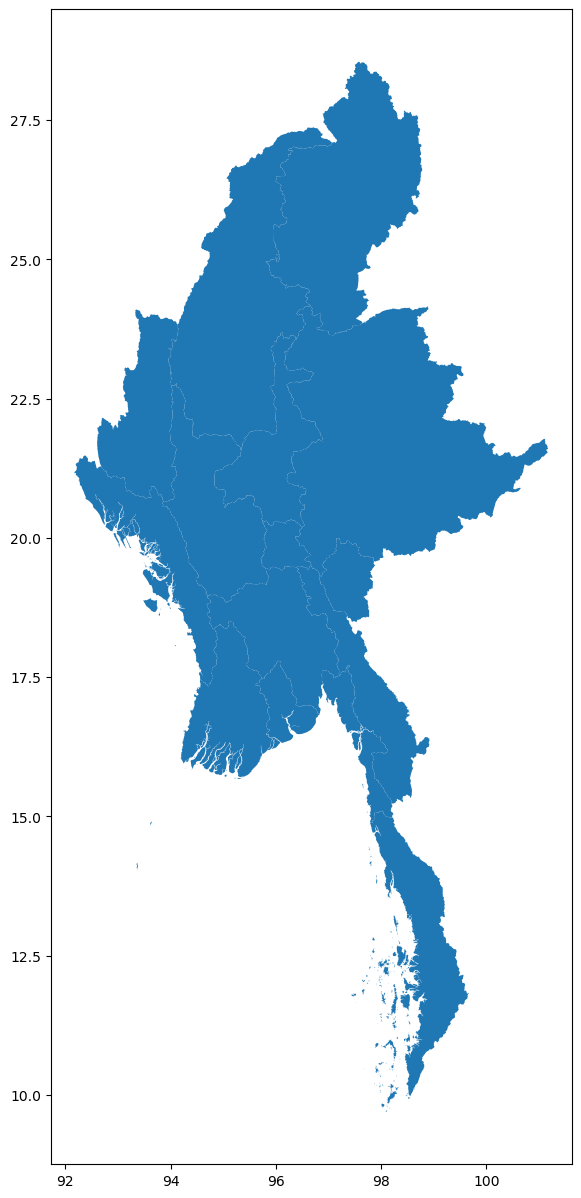

In [37]:
fig, ax = plt.subplots(figsize=(15,15))
myanmar_map.plot(ax=ax)

In [38]:
#Read CSV
map_df = pd.read_csv('/Users/catherinefuller/galvanize/daimil10/projects/Mid_Term/Myanmar_Food/data/wfp_food_prices_mmr 2.csv')

In [39]:
#Remove first row
map_df.drop(index=map_df.index[0], axis=0, inplace=True)

In [40]:
map_df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,cereals and tubers,Rice (low quality),KG,actual,Retail,MMK,400.0,63.0785
2,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,"meat, fish and eggs",Meat (chicken),KG,actual,Retail,MMK,3636.36,573.4413
3,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,"meat, fish and eggs",Meat (pork),KG,actual,Retail,MMK,3636.36,573.4413
4,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,vegetables and fruits,Onions,KG,actual,Retail,MMK,969.7,152.9177
5,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,vegetables and fruits,Tomatoes,KG,actual,Retail,MMK,484.85,76.4588


In [41]:
#Clean Data- Convert time to Datetime

map_df['date'] = pd.to_datetime(map_df['date'])

#Clean Date - Convert the price columns to float
map_df['price'] = map_df['price'].astype(float).round(2)
map_df['usdprice'] = map_df['usdprice'].astype(float).round(2)

#Clean Lat Long - Convert lat/long to float
map_df['latitude'] = map_df['latitude'].astype(float)
map_df['longitude'] = map_df['longitude'].astype(float)

In [42]:
map_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34195 entries, 1 to 34195
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       34195 non-null  datetime64[ns]
 1   admin1     34195 non-null  object        
 2   admin2     34195 non-null  object        
 3   market     34195 non-null  object        
 4   latitude   34195 non-null  float64       
 5   longitude  34195 non-null  float64       
 6   category   34195 non-null  object        
 7   commodity  34195 non-null  object        
 8   unit       34195 non-null  object        
 9   priceflag  34195 non-null  object        
 10  pricetype  34195 non-null  object        
 11  currency   34195 non-null  object        
 12  price      34195 non-null  float64       
 13  usdprice   34195 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(9)
memory usage: 3.7+ MB


In [43]:
map_example = map_df.iloc[:20]

In [44]:
geometry = [Point(xy) for xy in zip(map_df['longitude'], map_df['latitude'])]

In [45]:
geometry[:20]

[<POINT (97.44 25.342)>,
 <POINT (97.44 25.342)>,
 <POINT (97.44 25.342)>,
 <POINT (97.44 25.342)>,
 <POINT (97.44 25.342)>,
 <POINT (94.917 20.15)>,
 <POINT (94.917 20.15)>,
 <POINT (94.871 20.459)>,
 <POINT (95.204 21.537)>,
 <POINT (95.204 21.537)>,
 <POINT (95.204 21.537)>,
 <POINT (92.443 20.68)>,
 <POINT (92.527 20.87)>,
 <POINT (92.527 20.87)>,
 <POINT (92.527 20.87)>,
 <POINT (92.339 21.088)>,
 <POINT (92.339 21.088)>,
 <POINT (92.371 20.821)>,
 <POINT (92.371 20.821)>,
 <POINT (92.371 20.821)>]

In [46]:
myanmar_geo = gpd.GeoDataFrame(map_df, #specify our data
                          #crs=crs #specify our coordinate reference system
                          geometry=geometry)

In [47]:
myanmar_geo.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,geometry
1,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,cereals and tubers,Rice (low quality),KG,actual,Retail,MMK,400.00,63.08,POINT (97.44001 25.34222)
2,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,"meat, fish and eggs",Meat (chicken),KG,actual,Retail,MMK,3636.36,573.44,POINT (97.44001 25.34222)
3,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,"meat, fish and eggs",Meat (pork),KG,actual,Retail,MMK,3636.36,573.44,POINT (97.44001 25.34222)
4,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,vegetables and fruits,Onions,KG,actual,Retail,MMK,969.70,152.92,POINT (97.44001 25.34222)
5,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,vegetables and fruits,Tomatoes,KG,actual,Retail,MMK,484.85,76.46,POINT (97.44001 25.34222)


Text(0.5, 1.0, 'Most Volatile Markets in Myanmar')

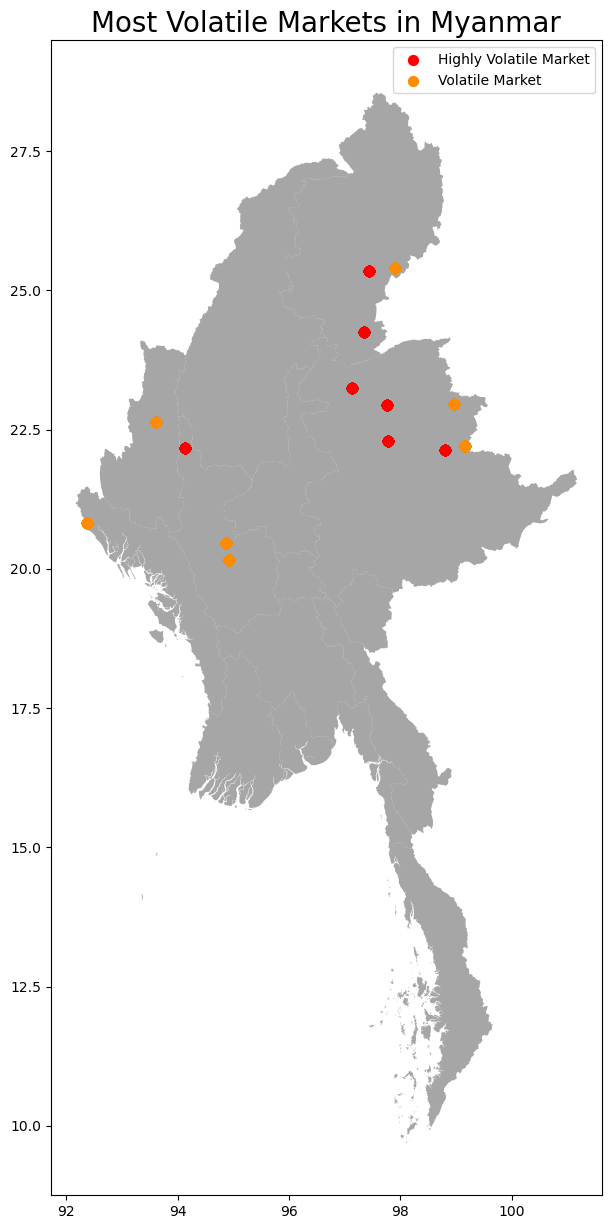

In [66]:
fig, ax = plt.subplots(figsize=(15,15))
myanmar_map.plot(ax=ax, alpha=0.7, color="grey")
myanmar_geo[(myanmar_geo['market'] == 'Man Pan') |
            (myanmar_geo['market'] == 'Manton') |
            (myanmar_geo['market'] == 'Momauk') |
            (myanmar_geo['market'] == 'Wai Maw') |
            (myanmar_geo['market'] == 'Gangaw') |
            (myanmar_geo['market'] == 'Pang Yang') |
            (myanmar_geo['market'] == 'Lashio Market')].plot(ax=ax, 
                                       markersize=50, 
                                       color='red', 
                                       marker='o', 
                                       label='Highly Volatile Market')
myanmar_geo[(myanmar_geo['market'] == 'Sadung') |
            (myanmar_geo['market'] == 'Pang Kham') |
            (myanmar_geo['market'] == 'Maungdaw') |
            (myanmar_geo['market'] == 'Magway') |
            (myanmar_geo['market'] == 'Kaung Ming Sang') |
            (myanmar_geo['market'] == 'Hakha Myoma Market') |
            (myanmar_geo['market'] == 'Yenanchaung')].plot(ax=ax, 
                                       markersize=50, 
                                       color='darkorange', 
                                       marker='o', 
                                       label='Volatile Market')

plt.legend(prop={'size':10})
plt.title("Most Volatile Markets in Myanmar", size=20)

Text(0.5, 1.0, 'Markets in Myanmar')

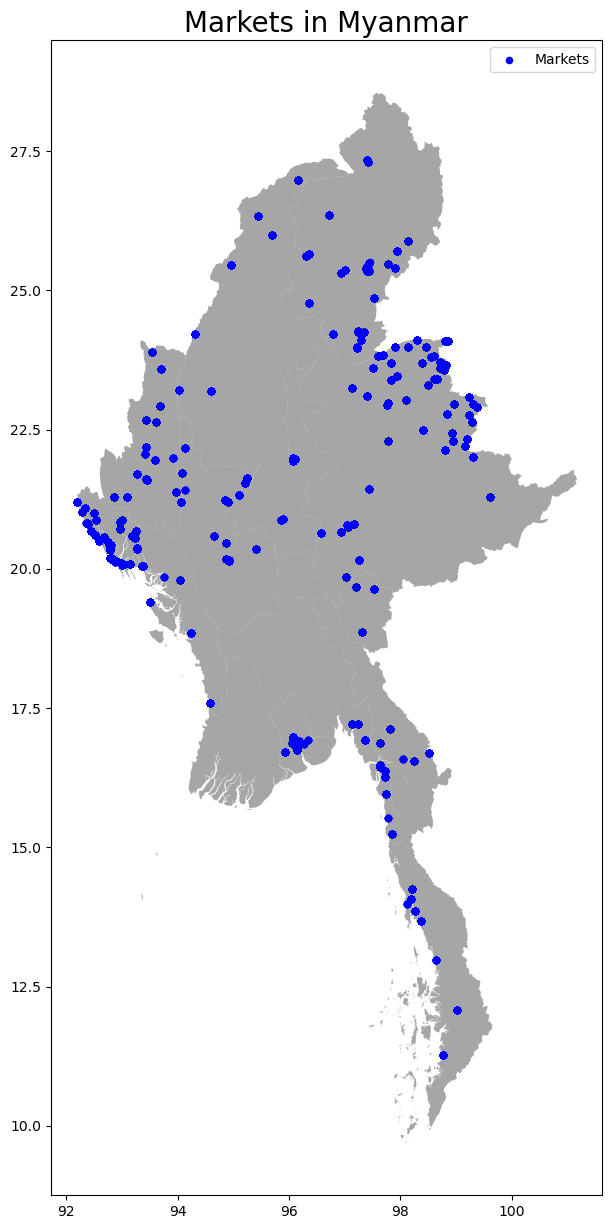

In [65]:
fig, ax = plt.subplots(figsize=(15,15))
myanmar_map.plot(ax=ax, alpha=0.7, color="grey")
myanmar_geo.plot(ax=ax, 
                markersize=20, 
                color='blue', 
                marker='o', 
                label='Markets')

plt.legend(prop={'size':10})
plt.title("Markets in Myanmar", size=20)